## Decision Tree Classification - Loan Repay Prediction


#### Introduction

- Exploring publicly available data present in __LendingClub.com__.
- LendingClub connects the people who need money(__Borrowers__) with the people who have money(__Investors__).

#### AIM: 

- Our Aim is to create a model that will predict the people who have high probability of paying back the loan.
- We are using the data from 2007 - 2010 and trying to classify and predict whether the borrower paid back the full loan amount or not.


### 1. Loading the libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Loading the dataset

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loan_data.csv")

#### 2.1 Reading the first five lines in the dataframe

In [18]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### 2.2 Reading the last five lines in the dataframe

In [19]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


### 3. Exploratory Data Analysis

#### 3.1 Checking the columns in the dataframe

In [20]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

__Observation:__

- Our dataframe as 14 columns including the target variable column as well as predictor variables.
- Our target variable column "not.fully.paid" which we are trying to predict is categorical.

#### 3.2 Checking the shape of the dataframe

In [21]:
df.shape

(9578, 14)

__Observation:__

- Our dataframe has 9578 observations and 14 features.

#### 3.3 Descriptive statistics of the dataframe

In [22]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### 3.4 Concise summary of the dataframe

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### Observation:

- Our dataset has one variable is of Object/String type and rest of the fields are of numerical(int/float) type.

#### 3.5 Checking the null values in the dataset

In [24]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### Observation:
- Our dataset does not have any null values and it is clean and neat.

#### 3.6 Analyzing the target variable

In [25]:
df["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

#### Observation:
- Our dataset has 8045 observations who has paid the full loan amount.
- 1533 observations who has not paid the full loan amount.

### 4. Data Visualization

#### 4.1 Visualizing the Distribution of FICO column (Credit score)

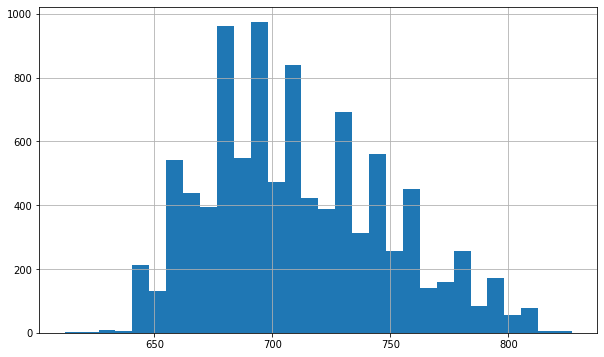

In [26]:
plt.figure(figsize = (10,6))
df["fico"].hist(bins = 30)

#### Observation:
- Looks like the credit score variable is normally distributed.
- Let's see the visualization of loan paid based on the FICO score.

#### 4.2 Visualization of loan paid based on the FICO score

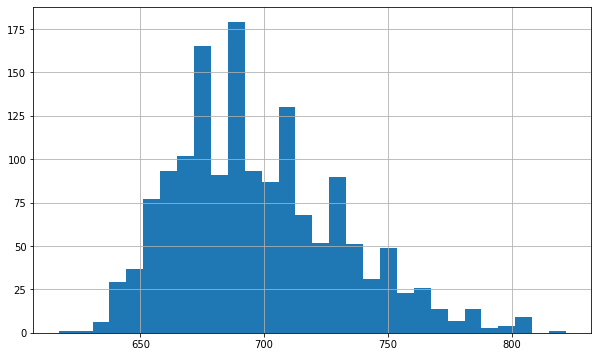

In [27]:
plt.figure(figsize = (10,6))
df[df["not.fully.paid"] == 1]["fico"].hist(bins = 30)

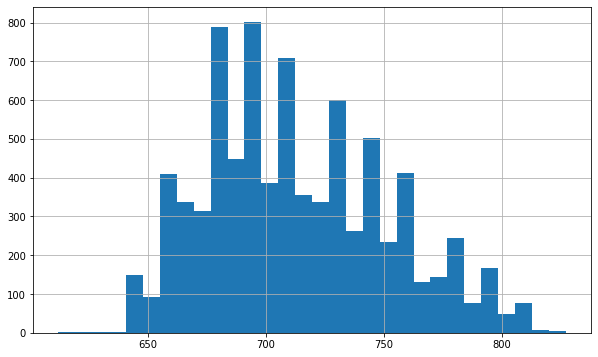

In [28]:
plt.figure(figsize = (10,6))
df[df["not.fully.paid"] == 0]["fico"].hist(bins = 30)

#### Observation:

- We could see that the FICO score distribution is similar for the people who have paid full loan amount and who have not paid the full loan amount.

#### 4.3 Visualizing the purpose column with target variable

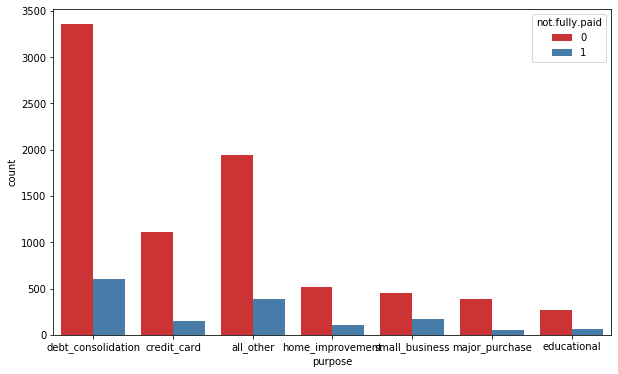

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(x = "purpose", hue = "not.fully.paid", data = df, palette = "Set1")

#### Observation:

- We can understand that purpose column describes the variance of the target variable well.
- As "purpose" is the only categorical column in our dataset, lets try to create dummy variables with the "purpose" column.

#### 4.4 Creating the dummy variables for "purpose" column

In [30]:
df = pd.get_dummies(data = df, columns = ["purpose"], drop_first = True)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


#### Observation:

- We have created the dummy variables for the "purpose" column and made all the columns ready for our prediction.
- we did not do feature scaling for our data as we are going to use Decision Tree classifier for predicting the results. 
- Decision Tree classifier not necessarily require all the data on the same scale for making the predictions.(Ref: https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1)

### 5. Model Development

#### 5.1 Seperating the X predictor variables

In [31]:
X = df.loc[:, df.columns != "not.fully.paid"]
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


#### 5.2 Seperating the Y target variable

In [32]:
Y = df.loc[:, df.columns == "not.fully.paid"]
Y.head()

,not.fully.paid
0,0
1,0
2,0
3,0
4,0


#### 5.3 Seperating the X and Y train and test split values

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

print("Training Set :")
print(X_train.shape)
print(Y_train.shape)
print("Test Set :")
print(X_test.shape)
print(Y_test.shape)

Training Set :
(7183, 18)
(7183, 1)
Test Set :
(2395, 18)
(2395, 1)


#### 5.4 Building the Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

### 6. Model Evaluation

#### 6.1 Evaluating the model using accuracy score(Round 1)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy score :", accuracy_score(Y_pred, Y_test))

Accuracy score : 0.727348643006263


#### 6.2 Evaluating the model using Confusion Matrix(Round 1)

In [51]:
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, Y_pred))

confusion_matrix.index = ["Actual Paid", "Actual Not Paid"]
confusion_matrix.columns = ["Predicted Paid", "Predicted Not Paid"]
print(confusion_matrix)

                 Predicted Paid  Predicted Not Paid
Actual Paid                1656                 336
Actual Not Paid             317                  86


In [ ]:
                 Predicted Paid  Predicted Not Paid
Actual Paid                1656                 317
Actual Not Paid             336                  86
                 Predicted Paid  Predicted Not Paid
Actual Paid                1656                 336
Actual Not Paid             317                  86